<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
 Final Project Programming for Data Science
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Asking + Preprocesssing +Analyzing data to answer each question</div>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data from csv file

In [2]:
udemy_df = pd.read_csv("./Data/udemy.csv", parse_dates = ['published_time', 'last_update_date'])
udemy_df.head(10)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75000,134.0,42.0,37.0,1268.0,2010-08-05 22:06:13,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50000,709.0,112.0,9.0,88.0,2010-01-12 18:09:46,NaT,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40000,41.0,13.0,14.0,82.0,2010-10-13 18:07:17,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80000,395.0,88.0,36.0,1511.0,2011-06-20 20:08:38,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75000,38.0,12.0,38.0,569.0,2011-06-23 18:31:20,NaT,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/
5,8139.0,14-Day Yoga Detox and Empowerment Course,True,29.99,"Lose weight, get healthier and fit on all leve...",20505.0,4.53012,796.0,135.0,31.0,1163.0,2011-07-15 04:13:24,2018-05-22,Health & Fitness,Yoga,Yoga,English,/course/yoga-for-weight-loss-and-core-strength...,Sadie Nardini,/user/sadienardini/
6,2762.0,Simple Strategy for Swing Trading the Stock Ma...,True,39.99,Use my favorite Technical Indicator and the Tr...,3309.0,3.85000,958.0,241.0,8.0,80.0,2010-04-14 16:32:46,2019-03-07,Finance & Accounting,Investing & Trading,Swing Trading,English,/course/swing-trading-the-stock-market/,Tom Watson,/user/tomwatson/
7,8082.0,Ruby Programming for Beginners,True,74.99,Learn Ruby Programming the fast and easy way!,28824.0,4.00000,741.0,189.0,56.0,363.0,2011-07-08 21:32:55,2022-09-26,Development,Programming Languages,Ruby,English,/course/learn-ruby-programming-in-ten-easy-steps/,Huw Collingbourne,/user/huwcollingbourne/
8,8075.0,How to Create an Awesome Demo Video for Your B...,True,149.99,You don't need to spend $10K in order to have ...,10761.0,3.90000,349.0,101.0,87.0,526.0,2011-07-06 14:06:34,2020-11-22,Business,Media,Demo Video,English,/course/how-to-create-awesome-demo-videos/,Miguel Hernandez,/user/miguelhernandez/
9,8069.0,Curso SEO Online,True,99.99,Curso SEO práctico. Aprenda a posicionar su si...,483.0,4.65000,100.0,45.0,73.0,373.0,2012-07-03 17:03:28,2020-02-28,Marketing,Search Engine Optimization,SEO,Spanish,/course/curso-de-posicionamiento-en-buscadores...,Juan Jose Ramos,/user/juanjo-ramos/


## Question 3: How udemy develope?

### Benefits of finding the answer?

- Insights into Online Education Trends: Understanding how Udemy developed provides insights into the trends and dynamics of the online education industry. This knowledge can be valuable for individuals interested in the field of e-learning.
- Entrepreneurial Inspiration: Udemy's success story can serve as inspiration for entrepreneurs looking to create platforms that make education more accessible. It showcases the potential for innovation in the education sector.
- Learning and Teaching Opportunities: Individuals interested in learning new skills or sharing their expertise can benefit from Udemy's platform. By understanding its development, users can make informed decisions about participating in the Udemy community.
- Impact on Education Accessibility: Udemy has played a role in making education accessible to a global audience. Understanding its development can contribute to discussions about the democratization of education and the role of technology in expanding learning opportunities.

### Preprocessing

- To make it easier to evaluate udemy's growth, we evaluate it by year. We create a column year.

In [3]:
udemy_df['year'] = udemy_df['published_time'].dt.year

### Analyze data to answer the question?

First, let's look at how subscriber numbers look over time.

In [4]:
num_sub_per_year = udemy_df.groupby('year')['num_subscribers'].sum()
display(num_sub_per_year)

year
2010        33727.0
2011      1328159.0
2012      7230026.0
2013     14813615.0
2014     27642396.0
2015     56527397.0
2016     68028864.0
2017     81376285.0
2018     92373156.0
2019     88915383.0
2020    120730813.0
2021     72812641.0
2022     17732035.0
Name: num_subscribers, dtype: float64

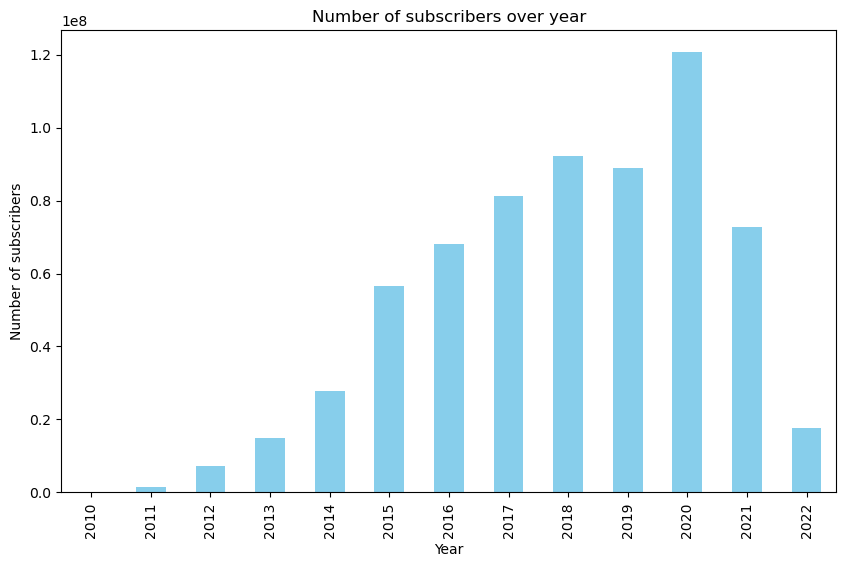

In [5]:
plt.figure(figsize=(10, 6))
num_sub_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of subscribers over year')
plt.xlabel('Year')
plt.ylabel('Number of subscribers')
plt.show()

- We see that the number of subscribers tends to increase each year. 
- In 2020, we saw a sudden increase in the number of subscribers, perhaps due to the covid 19 pandemic.

Next, the number of courses over time.

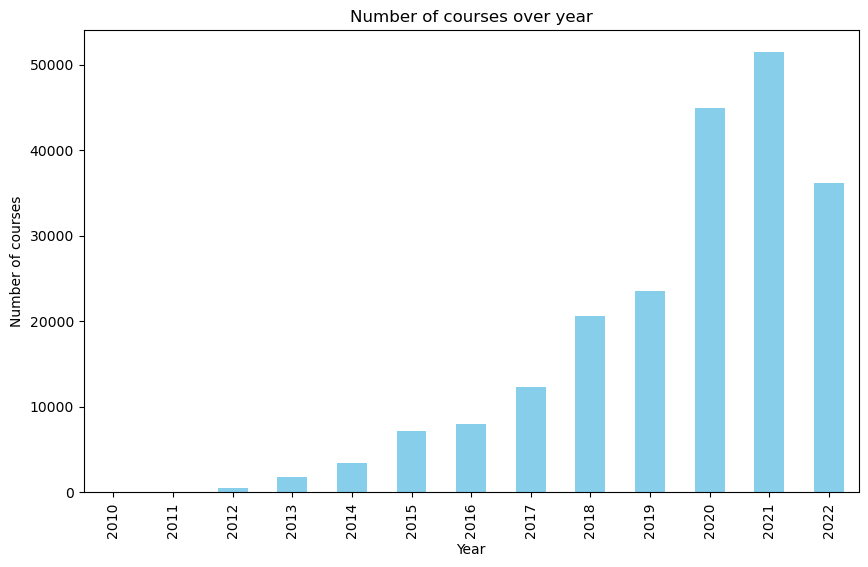

In [6]:
num_course_per_year = udemy_df.groupby('year')['id'].size()
plt.figure(figsize=(10, 6))
num_course_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of courses over year')
plt.xlabel('Year')
plt.ylabel('Number of courses')
plt.show()

The number of instructor over time.

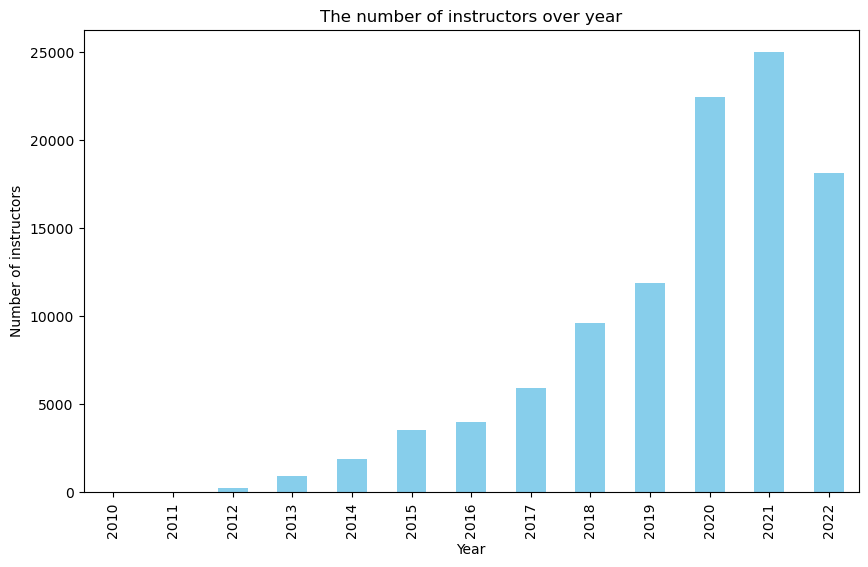

In [7]:
num_instruc_per_year = udemy_df.groupby('year')['instructor_name'].unique()
num_instruc_per_year = num_instruc_per_year.apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
num_instruc_per_year.plot(kind='bar', color='skyblue')
plt.title('The number of instructors over year')
plt.xlabel('Year')
plt.ylabel('Number of instructors')
plt.show()

- We can see that after 2020 the number of registrants increased dramatically, in 2021 the number of instructors and the number of courses continues to increase. However, the number of registrations has dropped quite sharply, which tells experienced teachers when to enter the teaching market appropriately.
- In general, the number of courses and instructors still tend to increase.

Now, we'll look at another aspect of udemy's growth, looking at the average duration of each course over time.

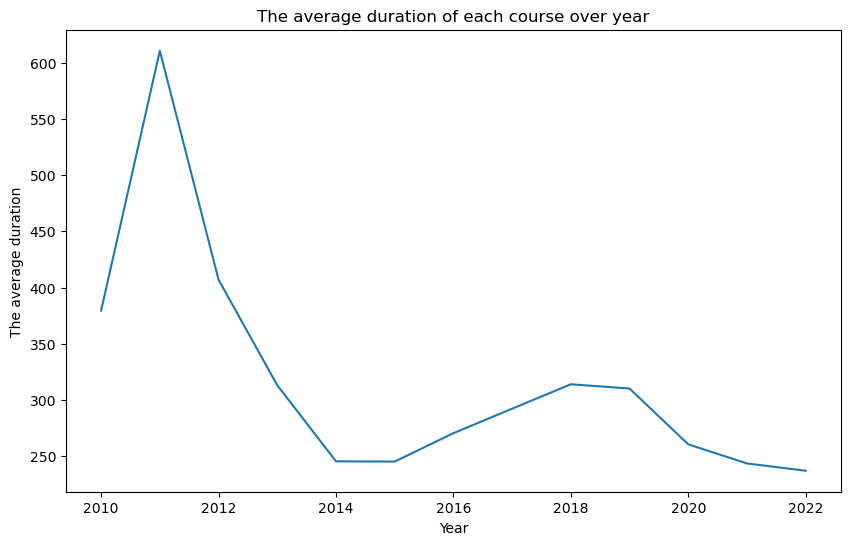

In [8]:
average_duration_per_year = udemy_df.groupby('year')['content_length_min'].mean()
plt.figure(figsize=(10, 6))
average_duration_per_year.plot()
plt.title('The average duration of each course over year')
plt.xlabel('Year')
plt.ylabel('The average duration')
plt.show()

- We see that the average duration of the course tends to decrease. This helps instructors and teaching centers adjust course times to suit the market.

#### Conclusion:
- Over the years, Udemy has experienced substantial growth in terms of the number of subscribers, instructors, and courses. The platform's user base has likely expanded significantly as more learners around the world turn to online education.
- The growth in the number of instructors and courses on Udemy indicates a diverse range of content available on the platform. This diversity attracts learners with varied interests and learning objectives, contributing to Udemy's popularity.
- Udemy's success is likely attributed to its global appeal, with a broad and diverse user base from different countries and cultures. The platform's ability to attract instructors and learners globally demonstrates its effectiveness in providing accessible education.
- Udemy's focus on both instructors and learners has contributed to its growth. Instructors are attracted by the opportunity to reach a global audience, while learners benefit from a wide array of courses tailored to various skill levels and interests.

### Question 4: The diversity and scaling of languages?

### Benefits of finding the answer?

- It helps us see the situation about the diversity and proportion of languages ​​used in udemy courses. This can also help us predict which languages ​​will be commonly used in the near future.
- Learners tend to engage more actively with content presented in their native language. Offering courses in multiple languages can lead to increased participation, comprehension, and retention of information, as learners feel more comfortable and connected to the material.
- Udemy can tap into new markets and demographics by offering courses in different languages. This expansion can lead to increased user base and revenue opportunities as the platform becomes more inclusive and diverse.

### Preprocessing

We count number of language used in courses

In [9]:
language_per_year = udemy_df.groupby('year')['language'].unique()
language_per_year = language_per_year.apply(lambda x: len(x))

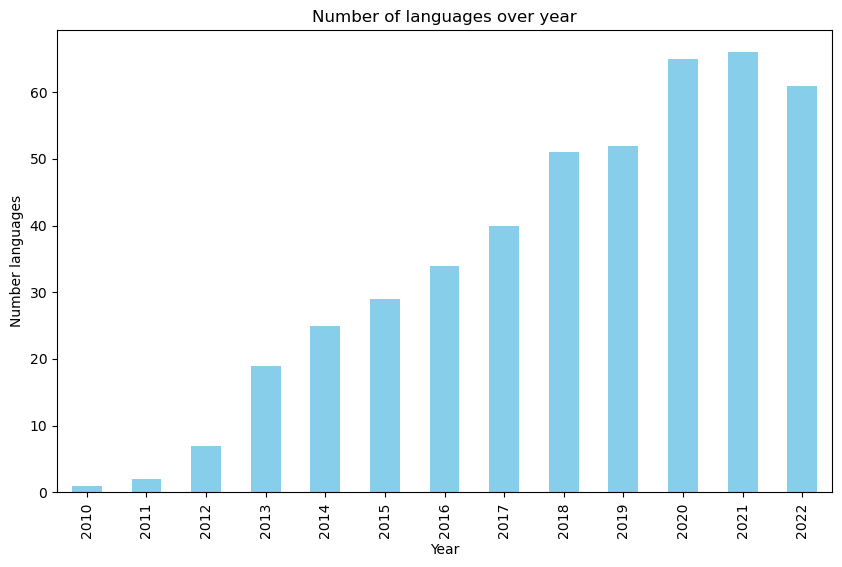

In [10]:
plt.figure(figsize=(10, 6))
language_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of languages over year')
plt.xlabel('Year')
plt.ylabel('Number languages')
plt.show()

We see languages ​​diversify over time, with more and more types of languages ​​serving learner.

Next, we look at how much each language is used. Because there are a lot of language, so we take 5 top most popular language, another language we put it type 'Other'

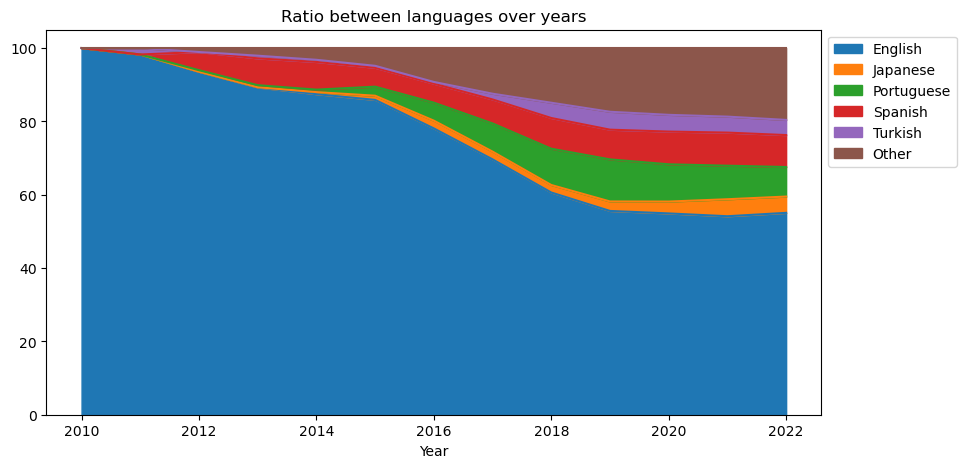

In [11]:
list_language_top = udemy_df.groupby('language')['id'].count().nlargest(5).index
list_language_top = pd.Series(list_language_top)
language_top = udemy_df[udemy_df['language'].isin(list_language_top)]
df_language = language_top.groupby(['year', 'language']).size().unstack(fill_value=0)
df_language['Other'] = udemy_df.groupby('year')['language'].size()- df_language.sum(axis=1)
df_percentage_language = df_language.div(df_language.sum(axis=1), axis=0) * 100
df_percentage_language.plot(kind='area', stacked=True, title='Ratio between languages over years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Year')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

- We can see the trend of using languages ​​such as 'Spanish', 'Postuguese', ... is increasing.
- English accounts for a large proportion but is no longer as dominant as before.

#### Conclusion:
- Udemy tailor its offerings to local markets by providing courses in languages specific to those regions. This adaptability can help the platform stay relevant and competitive in a globalized education landscape.
- Language diversity opens up opportunities for instructors proficient in specific languages to create and deliver content. This can attract skilled instructors from various linguistic backgrounds, enriching the platform with a diverse pool of expertise.